In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures



In [2]:
# Load the training and testing datasets
df = pd.read_csv('C:/Users/jssri/OneDrive/Documents/prodigy/01/train.csv',index_col='Id')
df.head()

#test_data = pd.read_csv("C:/Users/jssri/OneDrive/Documents/prodigy/01/test.csv")



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Dealing with missing values 

print("Percentage of Nan in each Column")
for column, percentage in ((df.isna().sum() / df.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
LotFrontage : 18 %
Alley : 94 %
MasVnrType : 60 %
MasVnrArea : 1 %
BsmtQual : 3 %
BsmtCond : 3 %
BsmtExposure : 3 %
BsmtFinType1 : 3 %
BsmtFinType2 : 3 %
Electrical : 1 %
FireplaceQu : 48 %
GarageType : 6 %
GarageYrBlt : 6 %
GarageFinish : 6 %
GarageQual : 6 %
GarageCond : 6 %
PoolQC : 100 %
Fence : 81 %
MiscFeature : 97 %


In [7]:
df.drop(columns=['MasVnrType','PoolQC','PoolArea','BsmtHalfBath','KitchenAbvGr','Utilities'],inplace=True)

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['Alley'] = df['Alley'].fillna("No Alley Acess")
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna("No Basment")
df['BsmtCond'] = df['BsmtCond'].fillna("No Basment")
df['BsmtExposure'] = df['BsmtExposure'].fillna("No Basment")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("No Basment")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("No Basment")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna("No Fireplace")
df['GarageType'] = df['GarageType'].fillna("No Garage")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna("No Garage")
df['GarageQual'] = df['GarageQual'].fillna("No Garage")
df['GarageCond'] = df['GarageCond'].fillna("No Garage")
df['Fence'] = df['Fence'].fillna("No Fence")
df['MiscFeature'] = df['MiscFeature'].fillna("No Miscellaneous Feature")

In [9]:
#Removing Outliers 

def remove_outlier(df, x):
    df[f'{x}_zscore'] = zscore(df[f'{x}'])
    df.drop(df[(df[f'{x}_zscore'] >= 3) | (df[f'{x}_zscore'] <= -3)].index, inplace=True)
    df.drop(columns=[f'{x}_zscore'], inplace=True)

In [10]:
columns = df.select_dtypes('number').columns.tolist()
for column in columns:
    remove_outlier(df, column)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 1 to 1457
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1001 non-null   int64  
 1   MSZoning       1001 non-null   object 
 2   LotFrontage    1001 non-null   float64
 3   LotArea        1001 non-null   int64  
 4   Street         1001 non-null   object 
 5   Alley          1001 non-null   object 
 6   LotShape       1001 non-null   object 
 7   LandContour    1001 non-null   object 
 8   LotConfig      1001 non-null   object 
 9   LandSlope      1001 non-null   object 
 10  Neighborhood   1001 non-null   object 
 11  Condition1     1001 non-null   object 
 12  Condition2     1001 non-null   object 
 13  BldgType       1001 non-null   object 
 14  HouseStyle     1001 non-null   object 
 15  OverallQual    1001 non-null   int64  
 16  OverallCond    1001 non-null   int64  
 17  YearBuilt      1001 non-null   int64  
 18  YearRemodAdd 

In [12]:
df.shape

(1001, 74)

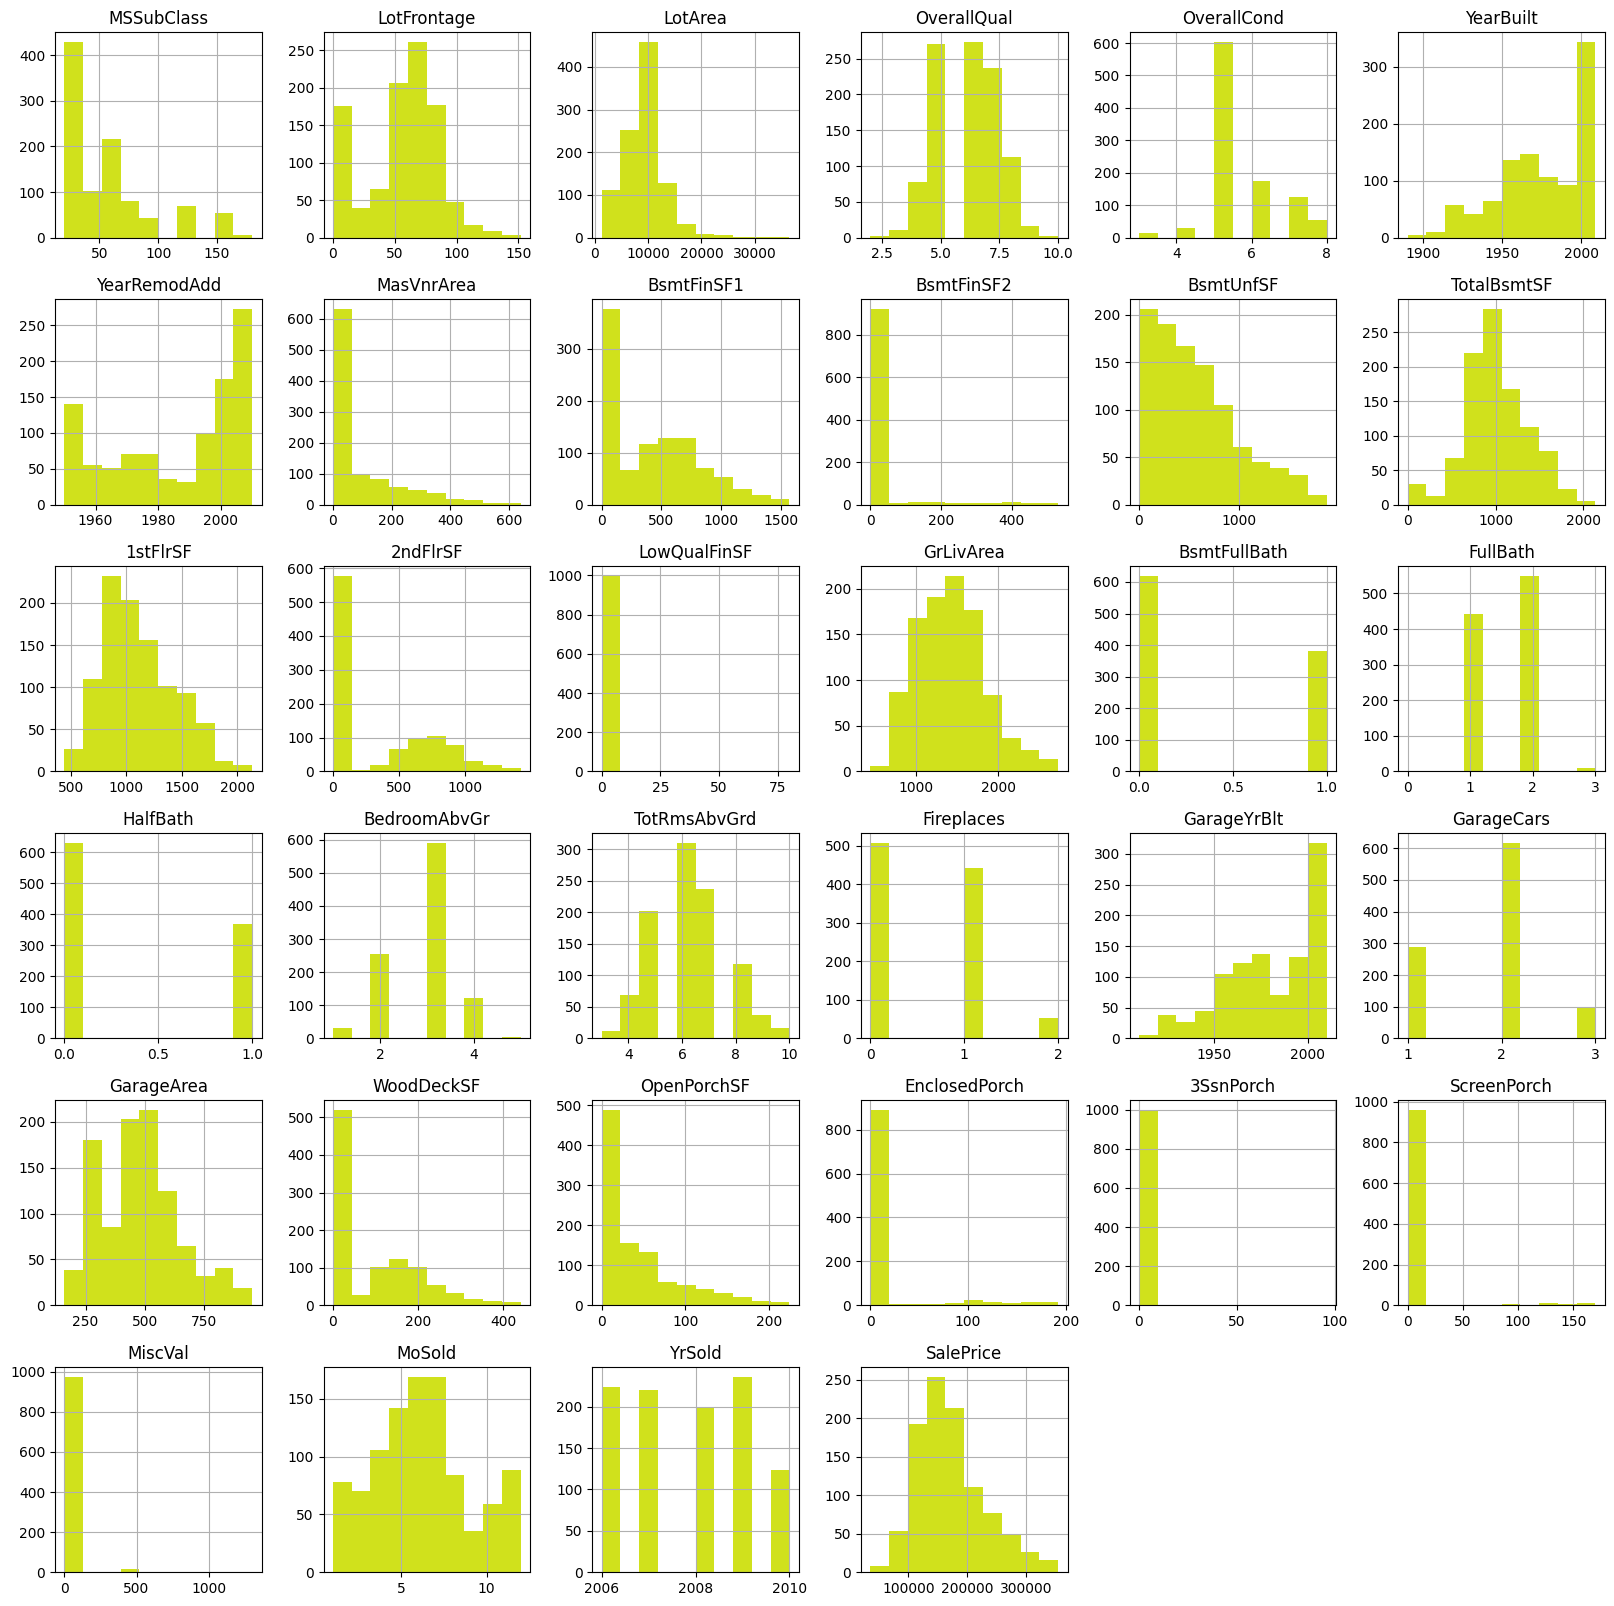

In [13]:
df.hist(figsize=(20, 20), xlabelsize=10, ylabelsize=10,color='#D0E11C');

In [14]:
df = pd.get_dummies(df,dtype=float,drop_first=True)

In [15]:
index_to_exclude = df.columns.get_loc('SalePrice')
X = df.iloc[:, [i for i in range(df.shape[1]) if i != index_to_exclude]].values
y = df.iloc[:,index_to_exclude].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=329) 

In [17]:
X_train_nstd = X_train.copy()
X_test_nstd = X_test.copy()
y_train_nstd = y_train.copy()

sc_X = StandardScaler()
X_train[:, :34] = sc_X.fit_transform(X_train[:, :34])
X_test[:, :34] = sc_X.transform(X_test[:, :34])
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()

In [23]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_nstd, y_train_nstd)

# Make predictions
y_pred = model.predict(X_test_nstd)
y_train_pred = model.predict(X_train_nstd)

In [24]:
r2_lr_train = r2_score(y_train_nstd, y_train_pred)
r2_lr_test = r2_score(y_test, y_pred.reshape(-1,1))
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)
mse_lr_train = mean_squared_error(y_train_nstd, y_train_pred)
mse_lr_test = mean_squared_error(y_test, y_pred.reshape(-1,1))
print("Mean Squared Error of Train:", mse_lr_train)
print("Mean Squared Error of Test:", mse_lr_test)

R2 Train Score: 0.9464358681358875
R2 Test Score: 0.907381914221081
Mean Squared Error of Train: 178354137.53381324
Mean Squared Error of Test: 285170799.04418904
